In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

happines_data = pd.read_csv('2019.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
X = happines_data[['GDP per capita',
                   'Social support', 
                   'Healthy life expectancy',
                   'Freedom to make life choices',
                   'Generosity',
                   'Perceptions of corruption']]

y = happines_data['Score']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Lasso Regression

In [5]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=0,
              alpha=0.0001)

lasso.fit(X_train, y_train)

print(f"""train: {lasso.score(X_train, y_train)}\ntest: {lasso.score(X_test, y_test)}""")

train: 0.8065412286696391
test: 0.6497328824055045


In [8]:
lasso.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 0,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

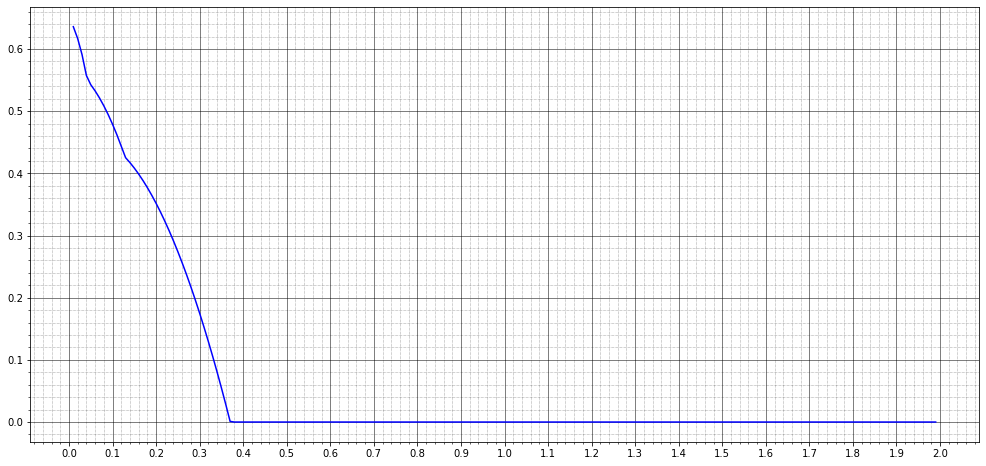

In [12]:
gammas = np.arange(0.01, 2, 0.01)
# gammas = [0.1, 1, 10, 100]
results = []

for feature in gammas:
    dt = Lasso(random_state=0, alpha=feature)
    dt.fit(X_train, y_train)
        
    results.append(dt.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17,8)) 
plt.plot(gammas, results, 'b')

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))

In [13]:
print(results[results.index(max(results))])
print(gammas[results.index(max(results))])

0.6358824126791952
0.01
